## Wine 데이터 분석 예제 ##
- 와인 품질 분류 데이터 셋을 사용하여 EDA와 시각화를 진행합니다.

### 라이브러리 로드 ###
- pandas, numpy, seaborn/matplot을 사용합니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('fivethirtyeight')

### 데이터 분석 및 정제 과정 ###

In [ ]:
#Load Data

train= pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample_submisson= pd.read_csv("./sample_submission.csv")

In [ ]:
display(train)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


각 컬럼은 다음의 내용에 해당됩니다.   
- index 구분자
- quality 품질
- fixed acidity 산도
-volatile acidity 휘발성산
-citric acid 시트르산
-residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
-chlorides 염화물
-free sulfur dioxide 독립 이산화황
-total sulfur dioxide 총 이산화황
-density 밀도
-pH 수소이온농도
-sulphates 황산염
-alcohol 도수
-type 종류



In [ ]:
#drop index column

train= train.drop(['index'],axis=1)
train.head(5)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


데이터의 특성, 결측값(NaN)여부를 확인합니다.

In [ ]:
#info 활용

train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5497 entries, 0 to 5496

Data columns (total 13 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   quality               5497 non-null   int64  

 1   fixed acidity         5497 non-null   float64

 2   volatile acidity      5497 non-null   float64

 3   citric acid           5497 non-null   float64

 4   residual sugar        5497 non-null   float64

 5   chlorides             5497 non-null   float64

 6   free sulfur dioxide   5497 non-null   float64

 7   total sulfur dioxide  5497 non-null   float64

 8   density               5497 non-null   float64

 9   pH                    5497 non-null   float64

 10  sulphates             5497 non-null   float64

 11  alcohol               5497 non-null   float64

 12  type                  5497 non-null   object 

dtypes: float64(11), int64(1), object(1)

memory usage: 558.4+ KB


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


pandas profiling 으로 간단하게 정보를 확인합니다.
- Overview에서 각 피쳐, 상관관계, 결측값 등의 정보를 얻을 수 있습니다.
- 각 피쳐의 Toggle detais를 눌러 상세한 정보를 확인하는 것이 가능합니다.


## EDA와 시각화 ###

6    2416

5    1788

7     924

4     186

8     152

3      26

9       5

Name: quality, dtype: int64


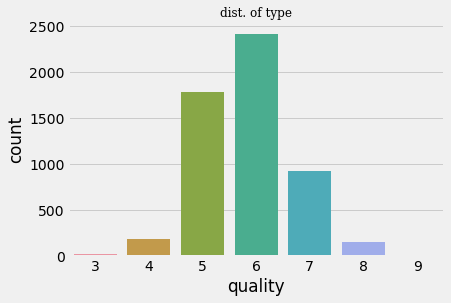

In [ ]:
# quality에 해당되는 컬럼의 값을 확인하고, 데이터의 분포를 시각화합니다.
# 여기는 카테고리 데이터의 빈도를 시각화합니다.
# 몇 등급의 와인이 가장 많이 있나요 ???

print(train['quality'].value_counts())
sns.countplot(x=train['quality']);
plt.title("dist. of type", fontfamily='serif',fontsize=12);

선택해야 하는 의미 있는 정보 (피처)가 너무 많다면 상관관계 분석을 통해 쉽게 접근 가능합니다.
- 여기는 다양한 변수간의 상관관계를 시각화하여 힌트를 얻습니다.
- 상관관계는 인과관계가 아님을 기억하세요!

In [ ]:
# distribution by 'quality'

numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')

def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])
        
show_dist_plot(train, numerical_columns)

상관관계를 한번에 확인 할 수 있는 히트맵으로 표기합니다.
- 히트맵은 변수와 변수 사이의 관계를 그려주는 그래프 입니다.

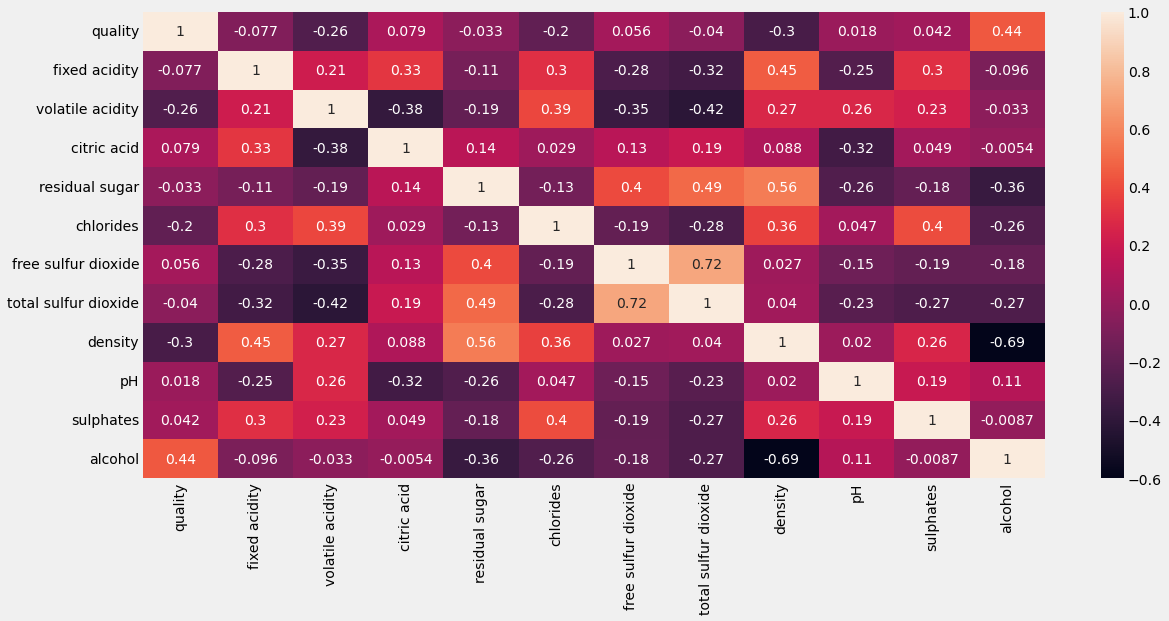

In [ ]:
plt.figure(figsize=(18,8))
corr= train.corr()
sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0);